## Czƒô≈õƒá I

In [53]:
import numpy as np
import scipy
import chardet
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint

# Zadanie 1.1

##### 1. Wczytaj dane i przygotuj je do analizy. Zadbaj o odpowiednie typy zmiennych, zweryfikuj czy przyjmujƒÖ warto≈õci zgodne z powy≈ºszym opisem, zbadaj czy nie wystƒôpujƒÖ braki w danych.

In [17]:
with open("D:/Na uczelniƒô semestr 6/Analiza danych ankietowych/ankieta.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [18]:
data = pd.read_csv("D:/Na uczelniƒô semestr 6/Analiza danych ankietowych/ankieta.csv", encoding='ISO-8859-1', sep=";")

Czy sƒÖ braki

In [19]:
czy_sa_braki = data.isna().any().any()
print(czy_sa_braki)

False


Zmiana nazwy kolumn

In [20]:
data.columns = ['DZIA≈Å', 'STA≈ª', 'CZY_KIER', 'PYT_1', 'PYT_2', 'PYT_3', 'P≈ÅEƒÜ', 'WIEK']

In [21]:
df = pd.DataFrame(data)

Sprawdzenie typ√≥w 

In [22]:
print(df.dtypes)

DZIA≈Å       object
STA≈ª         int64
CZY_KIER    object
PYT_1        int64
PYT_2        int64
PYT_3        int64
P≈ÅEƒÜ        object
WIEK         int64
dtype: object


In [23]:
# Wy≈õwietl liczbƒô wystƒÖpie≈Ñ ka≈ºdej warto≈õci w kolumnach
for kolumna in df.columns:
    print(f"Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print() 

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'DZIA≈Å':
PD    98
MK    45
HR    31
IT    26
Name: DZIA≈Å, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'STA≈ª':
2    140
1     41
3     19
Name: STA≈ª, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'CZY_KIER':
Nie    173
Tak     27
Name: CZY_KIER, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'PYT_1':
 1    100
 0     40
 2     29
-1     17
-2     14
Name: PYT_1, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'PYT_2':
 2    104
-2     74
-1     20
 1      2
Name: PYT_2, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'PYT_3':
 2    86
-2    52
 1    32
-1    30
Name: PYT_3, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'P≈ÅEƒÜ':
M    129
K     71
Name: P≈ÅEƒÜ, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'WIEK':
40    16
36    13
39    11
44    11
42    10
45    10
37     9
38     9
43     8
53     7
48     7
41     7
49     6
54     5
52     5
50     5
64     5
28     4
46     4
65     4
3

# Zadanie 1.2

Zosta≈Ça utworzona zmiennƒÖ WIEK_KAT, w kt√≥rej zosta≈Ça przeprowadzona kategoryzacja zmiennej WIEK korzystajƒÖc z nastƒôpujƒÖcych przedzia≈Ç√≥w: 
- do 35 lat, 
- miƒôdzy 36 a 45 lat, 
- miƒôdzy 46 a 55 lat,
- powy≈ºej 55 lat.

In [24]:
df['WIEK_KAT'] = pd.cut(df['WIEK'], 
                         bins=[0, 35, 45, 55, float('inf')], 
                         labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powy≈ºej 55 lat'],
                         right=True)  # Domkniƒôcie przedzia≈Ç√≥w z prawej strony

In [25]:
for kolumna in ['WIEK_KAT']:
    print(f"Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print()

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'WIEK_KAT':
36-45 lat         104
46-55 lat          45
do 35 lat          26
powy≈ºej 55 lat     25
Name: WIEK_KAT, dtype: int64



# Zadanie 1.3.

In [26]:
for kolumna in df.drop(columns=['WIEK', 'PYT_1', 'PYT_2', 'PYT_3']).columns:
    print(f"Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print()  

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'DZIA≈Å':
PD    98
MK    45
HR    31
IT    26
Name: DZIA≈Å, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'STA≈ª':
2    140
1     41
3     19
Name: STA≈ª, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'CZY_KIER':
Nie    173
Tak     27
Name: CZY_KIER, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'P≈ÅEƒÜ':
M    129
K     71
Name: P≈ÅEƒÜ, dtype: int64

Liczba wystƒÖpie≈Ñ warto≈õci w kolumnie 'WIEK_KAT':
36-45 lat         104
46-55 lat          45
do 35 lat          26
powy≈ºej 55 lat     25
Name: WIEK_KAT, dtype: int64



Wnioski:

# Zadanie 1.4

SporzƒÖdzone zosta≈Çy wykresy ko≈Çowe oraz wykresy s≈Çupkowe dla zmiennych: PYT_1 oraz PYT_2.

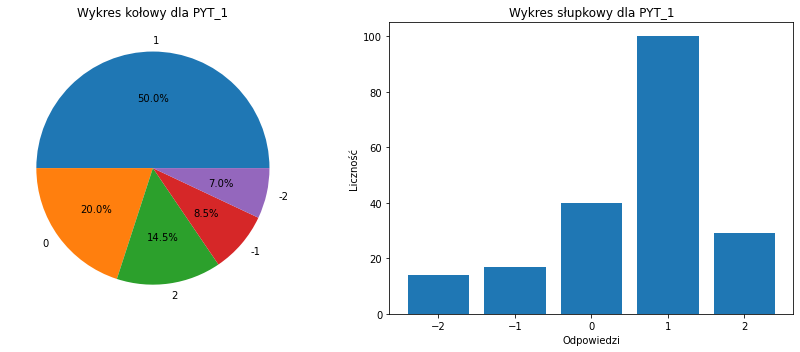

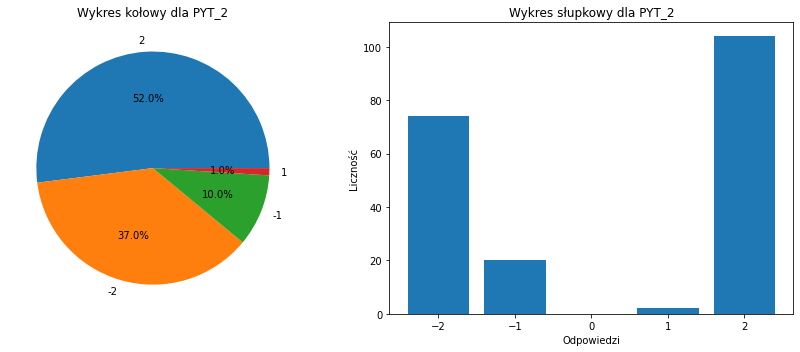

In [27]:
def generuj_wykresy(df, kolumna):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Wykres ko≈Çowy
    df[kolumna].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
    ax[0].set_title(f'Wykres ko≈Çowy dla {kolumna}')
    ax[0].set_ylabel('')

    # Wykres s≈Çupkowy z pe≈Çnym zakresem odpowiedzi
    zakres = [-2, -1, 0, 1, 2]
    wartosci = df[kolumna].value_counts().reindex(zakres, fill_value=0)
    ax[1].bar(wartosci.index, wartosci.values)
    ax[1].set_title(f'Wykres s≈Çupkowy dla {kolumna}')
    ax[1].set_xlabel('Odpowiedzi')
    ax[1].set_ylabel('Liczno≈õƒá')
    ax[1].set_xticks(zakres)

    plt.tight_layout()
    plt.show()

generuj_wykresy(df, 'PYT_1')
generuj_wykresy(df, 'PYT_2')


Na podstawie wykres√≥w ko≈Çowych i s≈Çupkowych dla zmiennych PYT_1 i PYT_2 mo≈ºna sformu≈Çowaƒá nastƒôpujƒÖce obserwacje:

1. PYT_1 dotyczy oceny wsparcia i materia≈Ç√≥w szkoleniowych oferowanych przez firmƒô.

- Najwiƒôcej ankietowanych (50%) zgodzi≈Ço siƒô ze stwierdzeniem, ≈ºe firma zapewnia odpowiednie wsparcie i materia≈Çy umo≈ºliwiajƒÖce skuteczne wykorzystanie w praktyce wiedzy zdobytej w trakcie szkole≈Ñ (warto≈õƒá 1), a 14,5% zdecydowanie siƒô zgodzi≈Ço (warto≈õƒá 2), co ≈ÇƒÖcznie daje 64,5% pozytywnych odpowiedzi.

- Mniejszy odsetek uczestnik√≥w ankiety wyrazi≈Ç brak zdania (0) lub niezgodƒô (-1, -2).

Wniosek: wiƒôkszo≈õƒá badanych pozytywnie ocenia materia≈Çy i wsparcie oferowane podczas szkole≈Ñ.

2. PYT_2 dotyczy oceny dopasowania szkole≈Ñ do indywidualnych potrzeb pracownika.

- 52% ankietowanych zdecydowanie siƒô zgodzi≈Ço ze stwierdzeniem, ≈ºe firma oferuje szkolenia dostosowane do potrzeb ankietowanych, wspierajƒÖc ich rozw√≥j zawodowy i szanse na awans (warto≈õƒá 2), a 1% wyrazi≈Ço umiarkowanƒÖ zgodƒô (warto≈õƒá 1), co og√≥lnie wskazuje na wysoki poziom pozytywnej oceny (≈ÇƒÖcznie 53%).

- Jednocze≈õnie 37% badanych zdecydowanie siƒô nie zgodzi≈Ço (warto≈õƒá -2) oraz 10% nie zgodzi≈Ço siƒô (warto≈õƒá -1), co wskazuje na istotnƒÖ grupƒô niezadowolonych.

Wniosek: opinie sƒÖ bardziej spolaryzowane ‚Äî choƒá dominuje ocena pozytywna, spora czƒô≈õƒá ankietowanuych ocenia szkolenia krytycznie.

# Zadanie 1.5.

In [28]:
# Tworzenie tabel wielodzielczych dla par zmiennych
tablice_wielodzielcze = {
    'PYT_1 vs DZIA≈Å': pd.crosstab(df['PYT_1'], df['DZIA≈Å']),
    'PYT_1 vs STA≈ª': pd.crosstab(df['PYT_1'], df['STA≈ª']),
    'PYT_1 vs CZY_KIER': pd.crosstab(df['PYT_1'], df['CZY_KIER']),
    'PYT_1 vs P≈ÅEƒÜ': pd.crosstab(df['PYT_1'], df['P≈ÅEƒÜ']),
    'PYT_1 vs WIEK_KAT': pd.crosstab(df['PYT_1'], df['WIEK_KAT'])
}

def rys_tabl_wielod(tablice_wielodzielcze):
    for nazwa, tabela in tablice_wielodzielcze.items():
        print(f"\nTabela wielodzielcza: {nazwa}")
        print(tabela)
        print()  # Dodanie pustej linii dla czytelno≈õci
        
rys_tabl_wielod(tablice_wielodzielcze)


Tabela wielodzielcza: PYT_1 vs DZIA≈Å
DZIA≈Å  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11


Tabela wielodzielcza: PYT_1 vs STA≈ª
STA≈ª    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2


Tabela wielodzielcza: PYT_1 vs CZY_KIER
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2


Tabela wielodzielcza: PYT_1 vs P≈ÅEƒÜ
P≈ÅEƒÜ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18


Tabela wielodzielcza: PYT_1 vs WIEK_KAT
WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powy≈ºej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5               8

Wnioski:

# Zadanie 1.6

SporzƒÖdzone zosta≈Çy tablice wielodzielcze dla pary zmiennych: PYT_2 i PYT_3

In [29]:
tablica_wielodzielcza = {'PYT_2 vs PYT_3':pd.crosstab(df['PYT_2'], df['PYT_3'])}
rys_tabl_wielod(tablica_wielodzielcza)


Tabela wielodzielcza: PYT_2 vs PYT_3
PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81



Na podstawie tablicy wielodzielczej przedstawiajƒÖcej relacjƒô miƒôdzy odpowiedziami w PYT_2 i PYT_3 dotyczƒÖce wsparcia w rozwoju zawodowym i mo≈ºliwo≈õci awansu w firmie, mo≈ºna zauwa≈ºyƒá wyra≈∫nƒÖ zmianƒô postaw:

Osoby, kt√≥re wcze≈õniej (w PYT_2) wyrazi≈Çy zdecydowanƒÖ zgodƒô (warto≈õƒá 2) w przewa≈ºajƒÖcej wiƒôkszo≈õci utrzyma≈Çy swojƒÖ pozytywnƒÖ ocenƒô: 81 os√≥b wskaza≈Ço ponownie warto≈õƒá 2, 15 ‚Äî warto≈õƒá 1. Niekt√≥rzy jednak zmienili swojƒÖ ocenƒô na negatywnƒÖ: 8 os√≥b, kt√≥re wcze≈õniej wkaza≈Ço warto≈õc 2 p√≥≈∫niej wskaza≈Ço warto≈õƒá -1.

Co istotne, wielu respondent√≥w, kt√≥rzy wcze≈õniej mieli ocenƒô negatywnƒÖ, zmieni≈Ço jƒÖ na bardziej pozytywnƒÖ:

W≈õr√≥d os√≥b, kt√≥re wcze≈õniej wybra≈Çy warto≈õƒá -2, 9 os√≥b p√≥≈∫niej udzieli≈Ço odpowiedzi 1 lub 2 (czyli pozytywnej), a 16 os√≥b wybra≈Ço warto≈õƒá -1 (negatywnej lecz mniej skrajnej). W≈õr√≥d os√≥b, kt√≥re wcze≈õniej wybra≈Çy warto≈õƒá -1, 3 z nich wyrazi≈Çy wiƒôksze niezadowolenie, lecz 11 os√≥b zmieni≈Ço swojƒÖ opiniƒô z negatywnej na pozytywnƒÖ.

Warto≈õci skrajnie negatywne w PYT_3 sƒÖ zauwa≈ºalnie rzadsze ni≈º w PYT_2.

Wniosek:
Po cyklu szkole≈Ñ nastƒÖpi≈Ça poprawa postrzegania dzia≈Ça≈Ñ firmy w zakresie wsparcia rozwoju zawodowego i awansu. Wiƒôkszo≈õƒá ankietowanych utrzyma≈Ça pozytywne oceny, a czƒô≈õƒá wcze≈õniej sceptycznych zmieni≈Ça zdanie na bardziej przychylne. Zmiany w negatywnƒÖ stronƒô dla firmy wystƒÖpi≈Çy w znacznie mniejszym stopniu. Mo≈ºe to ≈õwiadczyƒá o skuteczno≈õci wdro≈ºonej interwencji szkoleniowej.

# Zadanie 1.7

In [30]:
mapowanie = {
    -2: "Nie zadowolony",
    -1: "Nie zadowolony",
     1: "Zadowolony",
     2: "Zadowolony"
}

# Tworzenie nowej kolumny CZY_ZADOW
df['CZY_ZADOW'] = df['PYT_2'].map(mapowanie)

# Sprawdzenie wynik√≥w
print(df['CZY_ZADOW'].value_counts())


Zadowolony        106
Nie zadowolony     94
Name: CZY_ZADOW, dtype: int64


# Zadanie 1.8

Zosta≈Çy sporzƒÖdzone wykresy mozaikowe odpowiadajƒÖce parom zmiennych:
- CZY_ZADOW i DZIA≈Å, 
- CZY_ZADOW i STAZÀô,
- CZY_ZADOW i CZY_KIER, 
- CZY_ZADOW i P≈ÅEƒá¬¥,
- CZY_ZADOW i WIEK_KAT.

Odpowiedziano r√≥wnie≈º na pytanie: Czy na podstawie uzyskanch wykres√≥w mo≈ºna postawiƒá pewne hipotezy dotyczƒÖce realicji miƒôdzy powy≈ºszymi zmiennymi?

<Figure size 864x648 with 0 Axes>

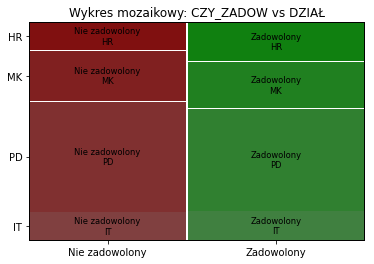

<Figure size 864x648 with 0 Axes>

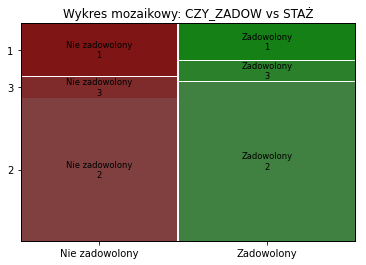

<Figure size 864x648 with 0 Axes>

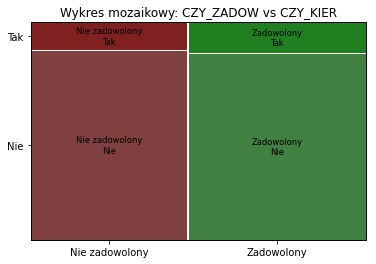

<Figure size 864x648 with 0 Axes>

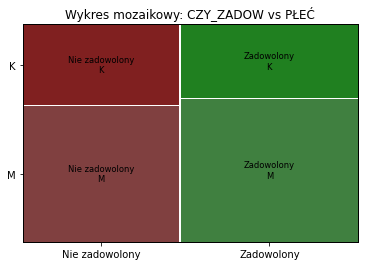

<Figure size 864x648 with 0 Axes>

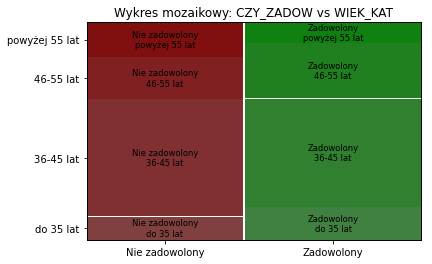

In [36]:
# Lista par zmiennych do wykres√≥w mozaikowych
pary_zmiennych = [
    ('CZY_ZADOW', 'DZIA≈Å'),
    ('CZY_ZADOW', 'STA≈ª'),
    ('CZY_ZADOW', 'CZY_KIER'),
    ('CZY_ZADOW', 'P≈ÅEƒÜ'),
    ('CZY_ZADOW', 'WIEK_KAT')
]

# Tworzenie wykres√≥w mozaikowych
for zmienna1, zmienna2 in pary_zmiennych:
    plt.figure(figsize=(12, 9))
    mosaic(df, [zmienna1, zmienna2], title=f'Wykres mozaikowy: {zmienna1} vs {zmienna2}')
    plt.show()



1. Pracownicy dzia≈Çu HR sƒÖ czƒô≈õciej zadowoleni ni≈º pracownicy innych dzia≈Ç√≥w.

2. Najkr√≥tszy sta≈º (1 rok) wiƒÖ≈ºe siƒô z wiƒôkszym niezadowoleniem w por√≥wnaniu do os√≥b ze sta≈ºem 2 lub 3 lata.

3. Kierownicy czƒô≈õciej deklarujƒÖ zadowolenie ni≈º pracownicy niepe≈ÇniƒÖcy funkcji kierowniczych.
Mo≈ºe to sugerowaƒá wiƒôksze obciƒÖ≈ºenie, odpowiedzialno≈õƒá lub mniejsze wsparcie.

4. Zadowolenie z pracy nie r√≥≈ºni siƒô istotnie miƒôdzy kobietami i mƒô≈ºczyznami.
Wykres mozaikowy dla p≈Çci pokazuje do≈õƒá zr√≥wnowa≈ºony rozk≈Çad.

5. Osoby powy≈ºej 55 lat wykazujƒÖ wyra≈∫nie wiƒôkszy poziom niezadowolenia.
Mo≈ºe to wynikaƒá z braku dalszych perspektyw rozwoju, zmƒôczenia lub mniejszej zgodno≈õci z firmowƒÖ kulturƒÖ.



## Czƒô≈õƒá II

# Zadanie 2

Celem zadania by≈Ço zilustrowanie odpowiedzi na pytanie "Jak bardzo zgadzasz siƒô ze stwierdzeniem, ≈ºe firma pozwala na (...)?"(zmienna PYT_1) w ca≈Çej badanej grupie oraz w podgrupach ze wzglƒôdu na zmiennƒÖ CZY_KIER. 

In [46]:
import altair as alt
import pandas as pd

# Etykiety odpowiedzi
labels = {
    -2: "Zdecydowanie siƒô nie zgadzam",
    -1: "Nie zgadzam siƒô",
     0: "Neutralnie",
     1: "Zgadzam siƒô",
     2: "Zdecydowanie siƒô zgadzam"
}

# Przygotowanie danych
df1 = df[['PYT_1', 'CZY_KIER']].copy()
df1['PYT_1_label'] = df1['PYT_1'].map(labels)

# Wykres og√≥lny
overall = alt.Chart(df1).mark_bar().encode(
    x=alt.X('PYT_1_label:N', title='Odpowiedzi na PYT_1', sort=list(labels.values())),
    y=alt.Y('count()', title='Liczba wystƒÖpie≈Ñ'),
    tooltip=['count()']
).properties(
    width=300,
    height=300,
    title="Rozk≈Çad odpowiedzi na PYT_1 w ca≈Çej grupie"
)

# Wykres z podzia≈Çem na CZY_KIER
subgroup = alt.Chart(df1).mark_bar().encode(
    x=alt.X('PYT_1_label:N', title='Odpowiedzi na PYT_1', sort=list(labels.values())),
    y=alt.Y('count()', title='Liczba wystƒÖpie≈Ñ'),
    color=alt.Color('CZY_KIER:N', title='Czy kierownik'),
    tooltip=['count()']
).properties(
    width=300,
    height=300,
    title="Rozk≈Çad odpowiedzi na PYT_1 wed≈Çug CZY_KIER"
)

# Wy≈õwietlenie obok siebie
alt.hconcat(overall, subgroup)


alt.HConcatChart(...)

# Zadanie 3

In [20]:
# Losowanie bez zwracania
np.random.choice(10, 5, replace=False)  # Losuje 5 unikalnych liczb z zakresu 0:9

array([9, 3, 6, 5, 2])

In [21]:
# Losowanie ze zwracaniem
np.random.choice(10, 5, replace=True)  # Losuje 5 liczb z zakresu 0:9, ze zwracaniem


array([1, 4, 2, 1, 5])

In [22]:
# Losowanie z wagami
np.random.choice(10, 5, replace=True, p=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.4, 0.1, 0.1, 0.1])

array([6, 6, 7, 3, 6])

In [23]:
# Losowanie pr√≥bki bez zwracania (10% rekord√≥w)
pr√≥bka_bez_zwracania = data.iloc[np.random.choice(len(data), int(len(data) * 0.1), replace=False)]

# Losowanie pr√≥bki ze zwracaniem (10% rekord√≥w)
pr√≥bka_ze_zwracaniem = data.iloc[np.random.choice(len(data), int(len(data) * 0.1), replace=True)]

In [24]:
pr√≥bka_bez_zwracania

DZIA≈Å  STA≈ª CZY_KIER  PYT_1  PYT_2  PYT_3 P≈ÅEƒÜ  WIEK        WIEK_KAT  \
149    MK     3      Tak      0     -2     -2    M    37       36-45 lat   
65     PD     2      Nie      1     -1      1    M    62  powy≈ºej 55 lat   
76     PD     2      Nie      1      2      1    K    41       36-45 lat   
34     PD     1      Nie     -1     -2     -2    M    28       do 35 lat   
82     PD     1      Nie      1     -2     -1    M    52       46-55 lat   
188    HR     2      Nie      1      2      2    M    49       46-55 lat   
186    HR     2      Tak      2      2      2    M    48       46-55 lat   
194    HR     3      Tak      1      2     -1    M    26       do 35 lat   
83     PD     1      Nie      1      2      2    M    54       46-55 lat   
174    HR     2      Nie      1      2      2    M    43       36-45 lat   
74     PD     2      Nie      1      2      2    K    44       36-45 lat   
54     PD     2      Nie      0     -2     -2    M    41       36-45 lat   
67     PD     1      Nie      1      2      2    M    28       do 35 lat   
130    MK     3      Nie      0     -2     -2    K    45       36-45 lat   
49     PD     1      Nie      1      2      2    M    44       36-45 lat   
125    MK     2      Nie      1      2      2    K    36       36-45 lat   
48     PD     3      Tak     -2      1      1    M    45       36-45 lat   
5      IT     3      Tak      0      1      1    K    57  powy≈ºej 55 lat   
161    MK     2      Nie      2      2      2    M    43       36-45 lat   
11     IT     2      Nie      2     -2     -2    K    48       46-55 lat   

          CZY_ZADOW  
149  Nie zadowolony  
65   Nie zadowolony  
76       Zadowolony  
34   Nie zadowolony  
82   Nie zadowolony  
188      Zadowolony  
186      Zadowolony  
194      Zadowolony  
83       Zadowolony  
174      Zadowolony  
74       Zadowolony  
54   Nie zadowolony  
67       Zadowolony  
130  Nie zadowolony  
49       Zadowolony  
125      Zadowolony  
48       Zadowolony  
5        Zadowolony  
161      Zadowolony  
11   Nie zadowolony

In [25]:
pr√≥bka_ze_zwracaniem 

DZIA≈Å  STA≈ª CZY_KIER  PYT_1  PYT_2  PYT_3 P≈ÅEƒÜ  WIEK        WIEK_KAT  \
158    MK     2      Nie      0     -2     -2    M    64  powy≈ºej 55 lat   
105    PD     2      Nie      1      2      2    K    36       36-45 lat   
68     PD     1      Nie     -1     -2     -1    M    25       do 35 lat   
112    PD     1      Tak     -1     -2     -1    M    37       36-45 lat   
18     IT     2      Nie      1      2     -1    K    34       do 35 lat   
30     PD     1      Nie      1      2      2    M    32       do 35 lat   
16     IT     2      Nie      0     -2     -2    K    45       36-45 lat   
33     PD     1      Nie     -1     -2     -2    M    25       do 35 lat   
154    MK     2      Nie      2      2      2    M    32       do 35 lat   
164    MK     2      Nie      1      2      2    M    50       46-55 lat   
165    MK     2      Tak      1      2      1    M    53       46-55 lat   
198    HR     2      Nie      1      2      1    K    48       46-55 lat   
192    HR     2      Tak      1      2      2    M    61  powy≈ºej 55 lat   
124    MK     2      Nie      1      2      2    K    40       36-45 lat   
143    MK     2      Nie      0     -2     -2    K    46       46-55 lat   
147    MK     2      Nie      1      2      2    K    48       46-55 lat   
55     PD     2      Nie      2      2      2    M    47       46-55 lat   
136    MK     2      Nie      2      2      2    K    41       36-45 lat   
93     PD     2      Nie      1      2      2    M    45       36-45 lat   
186    HR     2      Tak      2      2      2    M    48       46-55 lat   

          CZY_ZADOW  
158  Nie zadowolony  
105      Zadowolony  
68   Nie zadowolony  
112  Nie zadowolony  
18       Zadowolony  
30       Zadowolony  
16   Nie zadowolony  
33   Nie zadowolony  
154      Zadowolony  
164      Zadowolony  
165      Zadowolony  
198      Zadowolony  
192      Zadowolony  
124      Zadowolony  
143  Nie zadowolony  
147      Zadowolony  
55       Zadowolony  
136      Zadowolony  
93       Zadowolony  
186      Zadowolony

# Zadanie 4

Celem zadania by≈Ço zaproponowanie metody symulowania zmiennych losowych z rozk≈Çadu dwumianowego. Zosta≈Ça napisana funkcja do generowania realizacji, a nastƒôpnie zaprezentowano jej dzia≈Çanie por√≥wnujƒÖc wybrane teoretyczne i empiryczne charakterystyki dla przyk≈Çadowych warto≈õci paramert√≥w rozk≈Çadu: n i p

[5 6 4 ... 5 6 1]
Teoretyczne ≈õrednie: [30. 40. 30.]
Teoretyczne wariancje: [21. 24. 21.]
Empiryczne ≈õrednie: [30.0165 39.928  30.0555]
Empiryczne wariancje: [21.27382775 23.753416   21.20401975]


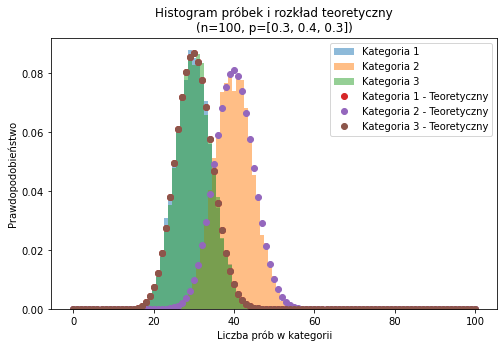

In [41]:
def binomial_random_variable(n, p, size=1):
    return np.sum(np.random.rand(size, n) < p, axis=1)

n, p = 10, 0.5
size = 10000
samples = binomial_random_variable(n, p, size)
print(samples)


def multinomial_random_variable(n, p, size=1):
    return np.random.multinomial(n, p, size)

n = 100
p = [0.3, 0.4, 0.3]
size = 10000
samples = multinomial_random_variable(n, p, size)

theoretical_means = np.array([n * p_i for p_i in p])
theoretical_variances = np.array([n * p_i * (1 - p_i) for p_i in p])

empirical_means = np.mean(samples, axis=0)
empirical_variances = np.var(samples, axis=0)

print("Teoretyczne ≈õrednie:", theoretical_means)
print("Teoretyczne wariancje:", theoretical_variances)
print("Empiryczne ≈õrednie:", empirical_means)
print("Empiryczne wariancje:", empirical_variances)

fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(p)):
    ax.hist(samples[:, i], bins=np.arange(n+2) - 0.5, density=True, alpha=0.5, label=f'Kategoria {i+1}')

x = np.arange(n+1)
for i, p_i in enumerate(p):
    pmf_theoretical = scipy.special.comb(n, x) * (p_i**x) * ((1 - p_i)**(n - x))
    ax.plot(x, pmf_theoretical, 'o', label=f'Kategoria {i+1} - Teoretyczny')

ax.set_title(f'Histogram pr√≥bek i rozk≈Çad teoretyczny\n(n={n}, p={p})')
ax.set_xlabel('Liczba pr√≥b w kategorii')
ax.set_ylabel('Prawdopodobie≈Ñstwo')
ax.legend()
plt.show()

# Zadanie 5

In [28]:
def generuj_wielomianowe_wlasne(n, p, rozmiar_proby):
    k = len(p)  # Liczba kategorii
    realizacje = np.zeros((rozmiar_proby, k), dtype=int)
    
    for i in range(rozmiar_proby):
        # Symulacja n pr√≥b wielokategorialnych
        wyniki = np.random.choice(k, size=n, p=p)
        # Zliczanie liczby sukces√≥w w ka≈ºdej kategorii
        realizacje[i] = np.bincount(wyniki, minlength=k)
    
    return realizacje

n = 10  # Liczba pr√≥b
p = [0.2, 0.3, 0.5]  # Wektor prawdopodobie≈Ñstw (suma musi byƒá r√≥wna 1)
rozmiar_proby = 1000  # Liczba realizacji

In [29]:
samples = generuj_wielomianowe_wlasne(n, p, rozmiar_proby)
print(samples)

# Empiryczne ≈õrednie i wariancje
empirical_mean = np.mean(samples, axis=0)
empirical_var = np.var(samples, axis=0, ddof=1)

# Teoretyczne ≈õrednie i wariancje
theoretical_mean = n * np.array(p)
theoretical_var = n * np.array(p) * (1 - np.array(p))

# Prezentacja wynik√≥w
data = pd.DataFrame({
    'Kategoria': [f'k{i+1}' for i in range(len(p))],
    '≈örednia teoretyczna': theoretical_mean,
    '≈örednia empiryczna': empirical_mean,
    'Wariancja teoretyczna': theoretical_var,
    'Wariancja empiryczna': empirical_var
})

print(data)


[[3 4 3]
 [3 2 5]
 [1 3 6]
 ...
 [1 3 6]
 [2 2 6]
 [1 6 3]]
  Kategoria  ≈örednia teoretyczna  ≈örednia empiryczna  Wariancja teoretyczna  \
0        k1                  2.0               2.126                    1.6   
1        k2                  3.0               2.837                    2.1   
2        k3                  5.0               5.037                    2.5   

   Wariancja empiryczna  
0              1.767892  
1              2.038469  
2              2.442073  


## Czƒô≈õƒá III oraz IV

# Zadanie 6

Zosta≈Ça napisana funkcja do wyznaczania realizacji przedzia≈Çu ufno≈õci Cloppera-Pearsona, oraz pokazno jej przyk≈Çadowe u≈ºycie.

In [67]:
def clopper_pearson(confidence, successes=None, trials=None, data=None):
    """
    Oblicza przedzia≈Ç ufno≈õci Cloppera-Pearsona dla prawdopodobie≈Ñstwa sukcesu w schemacie dwumianowym.
    
    Argumenty:
        confidence (float): Poziom ufno≈õci (np. 0.95 dla 95%)
        successes (int, opcjonalnie): Liczba sukces√≥w
        trials (int, opcjonalnie): Liczba pr√≥b
        data (list lub array, opcjonalnie): Wektor danych (0 - pora≈ºka, 1 - sukces)
    
    Zwraca:
        (dolna granica, g√≥rna granica) przedzia≈Çu ufno≈õci
    """
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    
    if successes is None or trials is None:
        raise ValueError("Musisz podaƒá albo (successes, trials), albo wektor data.")
    
    alpha = 1 - confidence
    lower_bound = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper_bound = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    return (lower_bound, upper_bound)

In [68]:
import math
# Przyk≈Çad 1: Podanie liczby sukces√≥w i pr√≥b
ci1 = clopper_pearson(0.95, successes=20, trials=100)
print("Przedzia≈Ç ufno≈õci (Clopper-Pearson) dla 20 sukces√≥w na 100 pr√≥b:", ci1)

# Przyk≈Çad 2: Podanie wektora danych
data = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
ci2 = clopper_pearson(0.95, data=data)
print("Przedzia≈Ç ufno≈õci (Clopper-Pearson) dla podanego wektora danych:", ci2)


Przedzia≈Ç ufno≈õci (Clopper-Pearson) dla 20 sukces√≥w na 100 pr√≥b: (0.1266555521019559, 0.2918426890886279)
Przedzia≈Ç ufno≈õci (Clopper-Pearson) dla podanego wektora danych: (0.3605425873074897, 0.8088099392746928)


# Zadanie 7

In [32]:
df['CZY_ZADW'] = df['PYT_2'].map(mapowanie) == "Zadowolony"
df['CZY_ZADW_2'] = df['PYT_3'].map(mapowanie) == "Zadowolony"

In [33]:
# Przedzia≈Ç ufno≈õci dla pierwszego okresu
ci_czy_zadw = clopper_pearson(0.95, data=df['CZY_ZADW'].astype(int))
print("Przedzia≈Ç ufno≈õci dla CZY_ZADW:", ci_czy_zadw)

# Przedzia≈Ç ufno≈õci dla drugiego okresu
ci_czy_zadw_2 = clopper_pearson(0.95, data=df['CZY_ZADW_2'].astype(int))
print("Przedzia≈Ç ufno≈õci dla CZY_ZADW_2:", ci_czy_zadw_2)

Przedzia≈Ç ufno≈õci dla CZY_ZADW: (0.45833050041147494, 0.6007670588028855)
Przedzia≈Ç ufno≈õci dla CZY_ZADW_2: (0.5184215852127789, 0.6588693543285322)


# Zadanie 8

Celem zadania by≈Ço zapoznanie siƒô z funkcjami do generowania zmiennych losowych z rozk≈Çadu dwumianowego oraz do wyznaczania przedzia≈Ç√≥w ufno≈õci dla parametru p. Do generowania danych u≈ºyto funkcji np.random.binomial() z biblioteki NumPy, a do wyznaczania przedzia≈Ç√≥w ufno≈õci dla parametru ùëù wykorzystano funkcjƒô proportion_confint() z biblioteki statsmodels,
z dwoma r√≥≈ºnymi metodami:
- 'beta' (dok≈Çadna metoda Cloppera-Pearsona),
- 'wilson' (przybli≈ºona, ale wƒô≈ºsza metoda Wilsona).

In [73]:
# Parametry: liczba pr√≥b (n), prawdopodobie≈Ñstwo sukcesu (p), liczba symulacji (size)
n, p, size = 100, 0.3, 10
losowe_dane = np.random.binomial(n, p, size)
print("Wygenerowane warto≈õci z rozk≈Çadu dwumianowego:", losowe_dane)

Wygenerowane warto≈õci z rozk≈Çadu dwumianowego: [24 33 21 28 29 28 31 36 32 35]


In [74]:
# Przyk≈Çadowe dane
sukcesy = 30
proby = 100
alpha = 0.05  # Poziom istotno≈õci (1 - poziom ufno≈õci)

# Przedzia≈Ç ufno≈õci metodƒÖ Cloppera-Pearsona
ci = proportion_confint(sukcesy, proby, alpha=alpha, method='beta')
print("Przedzia≈Ç ufno≈õci (Clopper-Pearson):", ci)

Przedzia≈Ç ufno≈õci (Clopper-Pearson): (0.21240642048953667, 0.39981467617980415)


In [75]:
ci_wilson = proportion_confint(sukcesy, proby, alpha=alpha, method='wilson')
print("Przedzia≈Ç ufno≈õci (Wilson):", ci_wilson)


Przedzia≈Ç ufno≈õci (Wilson): (0.21894885294932756, 0.39584854633346667)


# Zadanie 9

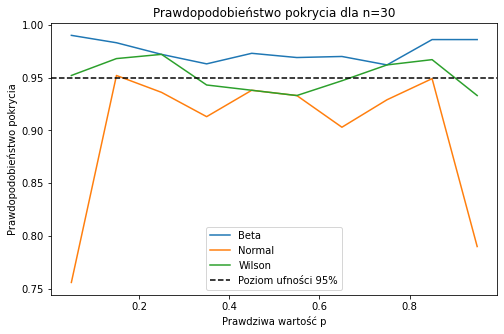

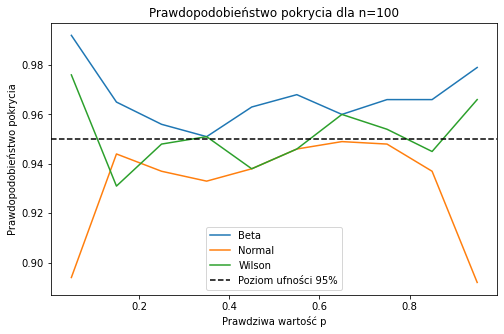

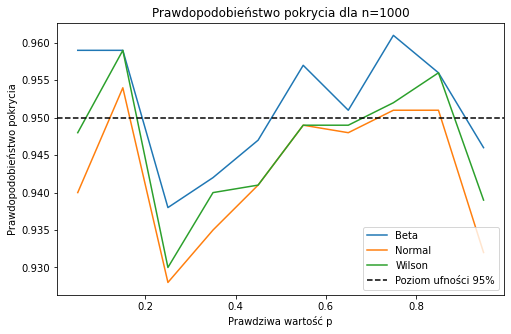

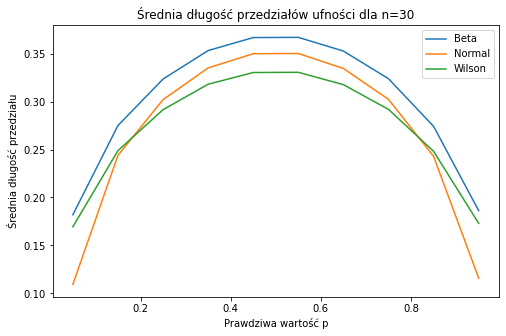

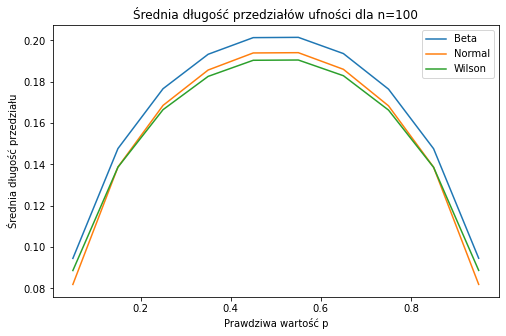

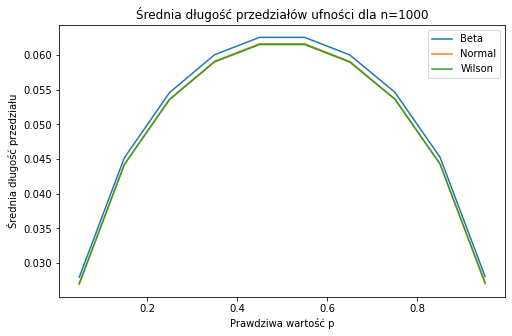

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

# Parametry symulacji
n_values = [30, 100, 1000]  # Rozmiary pr√≥by
p_values = np.linspace(0.05, 0.95, 10)  # R√≥≈ºne warto≈õci p
alpha = 0.05  # Poziom istotno≈õci (1 - poziom ufno≈õci)
num_simulations = 1000  # Liczba symulacji

# Przechowywanie wynik√≥w
coverage_results = {method: {n: [] for n in n_values} for method in ['beta', 'normal', 'wilson']}
length_results = {method: {n: [] for n in n_values} for method in ['beta', 'normal', 'wilson']}

# Symulacja dla ka≈ºdego n i p
for n in n_values:
    for p in p_values:
        coverage_counts = {method: 0 for method in ['beta', 'normal', 'wilson']}
        lengths = {method: [] for method in ['beta', 'normal', 'wilson']}

        for _ in range(num_simulations):
            successes = np.random.binomial(n, p)

            for method in ['beta', 'normal', 'wilson']:
                ci_lower, ci_upper = proportion_confint(successes, n, alpha=alpha, method=method)
                lengths[method].append(ci_upper - ci_lower)

                # Sprawdzenie, czy prawdziwe p znajduje siƒô w przedziale
                if ci_lower <= p <= ci_upper:
                    coverage_counts[method] += 1

        # ≈örednia d≈Çugo≈õƒá przedzia≈Çu
        for method in ['beta', 'normal', 'wilson']:
            coverage_results[method][n].append(coverage_counts[method] / num_simulations)
            length_results[method][n].append(np.mean(lengths[method]))

# Tworzenie wykres√≥w pokrycia
for n in n_values:
    plt.figure(figsize=(8, 5))
    for method in ['beta', 'normal', 'wilson']:
        plt.plot(p_values, coverage_results[method][n], label=method.capitalize())
    plt.axhline(0.95, color='black', linestyle='--', label='Poziom ufno≈õci 95%')
    plt.xlabel('Prawdziwa warto≈õƒá p')
    plt.ylabel('Prawdopodobie≈Ñstwo pokrycia')
    plt.title(f'Prawdopodobie≈Ñstwo pokrycia dla n={n}')
    plt.legend()
    plt.show()

# Tworzenie wykres√≥w d≈Çugo≈õci przedzia≈Ç√≥w
for n in n_values:
    plt.figure(figsize=(8, 5))
    for method in ['beta', 'normal', 'wilson']:
        plt.plot(p_values, length_results[method][n], label=method.capitalize())
    plt.xlabel('Prawdziwa warto≈õƒá p')
    plt.ylabel('≈örednia d≈Çugo≈õƒá przedzia≈Çu')
    plt.title(f'≈örednia d≈Çugo≈õƒá przedzia≈Ç√≥w ufno≈õci dla n={n}')
    plt.legend()
    plt.show()


## Czƒô≈õƒá V

# Zadanie 10

Celem zadani by≈Ço zapoznanie siƒô z funkcjami s≈Çu≈ºacymi do wykonania testu dok≈Çadnego oraz asympotycznego weryfikujƒÖcego hipotezƒô zerowƒÖ dotyczƒÖcƒÖ prawodopodobie≈Ñstwa sukcesu z rozk≈Çadu dwumianowego. Przetestowano ich dzia≈Çanie.

In [79]:
from scipy.stats import binomtest

# parametry
successes = 15
n = 20
p0 = 0.5

# test dwustronny
result_binom = binomtest(successes, n, p=p0, alternative='two-sided')
print("Binomtest (dok≈Çadny):")
print("p-value:", result_binom.pvalue)

Binomtest (dok≈Çadny):
p-value: 0.04138946533203125


In [80]:
from statsmodels.stats.proportion import proportions_ztest

# z-test dla jednej proporcji
count = successes
nobs = n

stat, pval = proportions_ztest(count, nobs, value=p0)
print("\nZ-test (asymptotyczny):")
print("statystyka z:", stat)
print("p-value:", pval)


Z-test (asymptotyczny):
statystyka z: 2.581988897471611
p-value: 0.009823274507519249


# Zadanie 11

In [43]:
import pandas as pd
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05  # poziom istotno≈õci

### 1. Czy P(plec='kobieta') = 0.5?

n_kobiet = (df['P≈ÅEƒÜ'] == 'kobieta').sum()
n_osob = df['P≈ÅEƒÜ'].notna().sum()

test1 = binomtest(n_kobiet, n_osob, p=0.5, alternative='two-sided')
print("Hipoteza 1: P(kobieta) = 0.5")
print("p-value:", test1.pvalue)
print("Wniosek:", "Odrzucamy H0" if test1.pvalue < alpha else "Brak podstaw do odrzucenia H0")
print()

### 2. Czy P(PYT_1='tak') ‚â• 0.7?

szkolenia_tak = (df['PYT_1'] == 'tak').sum()
n_szk = df['PYT_1'].notna().sum()

test2 = binomtest(szkolenia_tak, n_szk, p=0.7, alternative='greater')
print("Hipoteza 2: P(PYT_1='tak') ‚â• 0.7")
print("p-value:", test2.pvalue)
print("Wniosek:", "Odrzucamy H0" if test2.pvalue < alpha else "Brak podstaw do odrzucenia H0")
print()

### 3. Czy P(kierownicze | kobieta) == P(kierownicze | mƒô≈ºczyzna)

df_k = df[df['P≈ÅEƒÜ'] == 'kobieta']
df_m = df[df['P≈ÅEƒÜ'] == 'mƒô≈ºczyzna']

count = [
    (df_k['CZY_KIER'] == 'tak').sum(),
    (df_m['CZY_KIER'] == 'tak').sum()
]
nobs = [df_k['CZY_KIER'].notna().sum(), df_m['CZY_KIER'].notna().sum()]

stat3, pval3 = proportions_ztest(count, nobs)
print("Hipoteza 3: P(kierownicze | kobieta) = P(kierownicze | mƒô≈ºczyzna)")
print("p-value:", pval3)
print("Wniosek:", "Odrzucamy H0" if pval3 < alpha else "Brak podstaw do odrzucenia H0")
print()

### 4. Czy P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mƒô≈ºczyzna)

count = [
    (df_k['PYT_1'] == 'tak').sum(),
    (df_m['PYT_1'] == 'tak').sum()
]
nobs = [df_k['PYT_1'].notna().sum(), df_m['PYT_1'].notna().sum()]

stat4, pval4 = proportions_ztest(count, nobs)
print("Hipoteza 4: P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mƒô≈ºczyzna)")
print("p-value:", pval4)
print("Wniosek:", "Odrzucamy H0" if pval4 < alpha else "Brak podstaw do odrzucenia H0")
print()
# Hipoteza 5: P(ZL | kobieta) ‚â• P(ZL | mƒô≈ºczyzna)
# U≈ºywamy testu jednostronnego: H0: p1 - p2 = 0, H1: p1 - p2 > 0

count = [
    (df_k['DZIA≈Å'] == 'HR').sum(),
    (df_m['DZIA≈Å'] == 'HR').sum()
]
nobs = [df_k['DZIA≈Å'].notna().sum(), df_m['DZIA≈Å'].notna().sum()]

stat5, pval5 = proportions_ztest(count, nobs, alternative='larger')
print("Hipoteza 5: P(HR | kobieta) ‚â• P(HR | mƒô≈ºczyzna)")
print("p-value:", pval5)
print("Wniosek:", "Odrzucamy H0" if pval5 < alpha else "Brak podstaw do odrzucenia H0")

Hipoteza 1: P(kobieta) = 0.5
p-value: 1.2446030555722283e-60
Wniosek: Odrzucamy H0

Hipoteza 2: P(PYT_1='tak') ‚â• 0.7
p-value: 1.0
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 3: P(kierownicze | kobieta) = P(kierownicze | mƒô≈ºczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 4: P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mƒô≈ºczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 5: P(HR | kobieta) ‚â• P(HR | mƒô≈ºczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0


# Zadanie 12

Celem zadania by≈Ço wyznaczenie symulacyjnie mocy testu dok≈Çadnego oraz mocy testu asymptotycznego w przypadku weryfikacji hipotezy zerowej H‚ÇÄ: p = 0.9 przeciwko H‚ÇÅ: p ‚â† 0.9, przyjmujƒÖc warto≈õƒá 1 ‚àí Œ± = 0.95. Uwzglƒôdniono r√≥≈ºne warto≈õci alternatyw i r√≥≈ºne rozmiary pr√≥by.

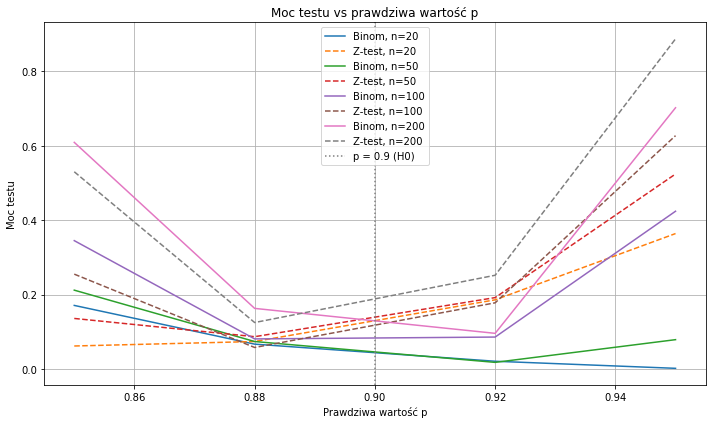

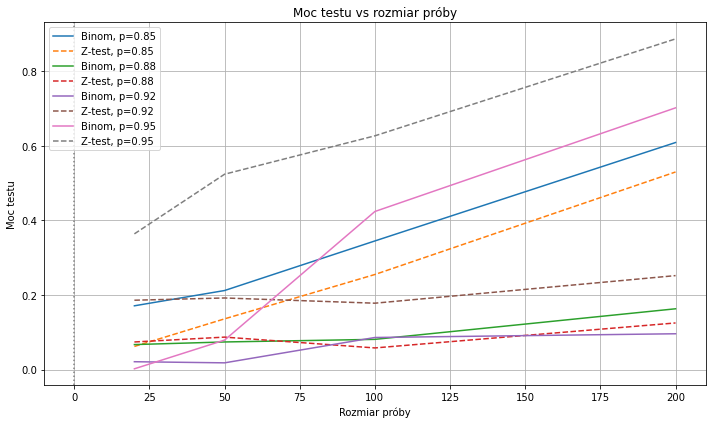

In [102]:
import numpy as np
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

# Parametry testu
p0 = 0.9
alpha = 0.05
simulations = 1000
n_values = [20, 50, 100, 200]
p_alt_values = [0.85, 0.88, 0.92, 0.95]

# Wyniki mocy: moc[p][n]
power_binom = {p: [] for p in p_alt_values}
power_ztest = {p: [] for p in p_alt_values}

for n in n_values:
    for p_alt in p_alt_values:
        rejections_binom = 0
        rejections_ztest = 0

        for _ in range(simulations):
            sample = np.random.binomial(1, p_alt, size=n)
            successes = sample.sum()

            p_binom = binomtest(successes, n, p=p0, alternative='two-sided').pvalue
            if p_binom < alpha:
                rejections_binom += 1

            stat, p_z = proportions_ztest(count=successes, nobs=n, value=p0, alternative='two-sided')
            if p_z < alpha:
                rejections_ztest += 1

        power_binom[p_alt].append(rejections_binom / simulations)
        power_ztest[p_alt].append(rejections_ztest / simulations)

# Wykres 1: moc wzglƒôdem prawdziwej warto≈õci p
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(p_alt_values,
             [power_binom[p][n_values.index(n)] for p in p_alt_values],
             label=f"Binom, n={n}", linestyle='-')
    plt.plot(p_alt_values,
             [power_ztest[p][n_values.index(n)] for p in p_alt_values],
             label=f"Z-test, n={n}", linestyle='--')

plt.axvline(p0, color='gray', linestyle=':', label="p = 0.9 (H0)")
plt.xlabel("Prawdziwa warto≈õƒá p")
plt.ylabel("Moc testu")
plt.title("Moc testu vs prawdziwa warto≈õƒá p")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykres 2: moc wzglƒôdem rozmiaru pr√≥by
plt.figure(figsize=(10, 6))
for p_alt in p_alt_values:
    plt.plot(n_values,
             power_binom[p_alt],
             label=f"Binom, p={p_alt}", linestyle='-')
    plt.plot(n_values,
             power_ztest[p_alt],
             label=f"Z-test, p={p_alt}", linestyle='--')

plt.axvline(x=0, color='gray', linestyle=':')
plt.xlabel("Rozmiar pr√≥by")
plt.ylabel("Moc testu")
plt.title("Moc testu vs rozmiar pr√≥by")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Wnioski: 

Najwiƒôksza moc test√≥w wystƒôpuje, gdy p jest znacznie r√≥≈ºne od 0.9 (czyli daleko od hipotezy zerowej).Dla warto≈õci bliskich p = 0.9 (czyli H‚ÇÄ) moc testu spada ‚Äî co jest naturalne, bo trudniej odr√≥≈ºniƒá warto≈õci bliskie hipotezie zerowej.Test Z ma wyra≈∫nie wy≈ºszƒÖ moc ni≈º test binominalny. Moc test√≥w ro≈õnie wraz ze wzrostem liczno≈õci pr√≥by, niezale≈ºnie od testu i warto≈õci p. Dla p = 0.95, test Z szybciej osiƒÖga wysokƒÖ moc, a test binominalny ro≈õnie wolniej ‚Äî sugerujƒÖc przewagƒô testu Z przy du≈ºych pr√≥bach.